# Influence Measures and Network Centralization

Different ways to measure importance:
- High degree of connections to other nodes
- higher Average proximity to other nodes
- Important nodes are those who tend to connect to other nodes in the nx --> the fraction of shortest paths that pass through a particular node


Centrality measures identify the most important nodes in a network:
- influential nodes in nx
- nodes that disseminate info to many nodes or preven epidemics
- hubs in transportation network
- important pages on the web
- nodes that prevent the nx from breaking up

commonly used Centrality Measures:
- **Degree centrality**
- **Closeness centrality**
- betweeness centrality
- page rank
- Katz centrality
- percolation centrality

## Degree Centrality

assumption: important nodes have many connections 

basic measure --> number of neighbours


**Undirected Nx: use degree**

C(v) = dv/N-1   [goes from 0 to 1]

dv: degree of node v,
N: set of nodes

**Directed Nx: use in-degree or out-degree**

Cin(v) = dv_in/N-1

Cout(v) = dv_out/N-1

dv_in: in-degree of node v

### In Py

In [2]:
#uNdirected
import networkx as nx
G=nx.karate_club_graph()
G= nx.convert_node_labels_to_integers(G,first_label=1)
degCent = nx.degree_centrality(G)
degCent[34]

0.5151515151515151

## Closeness centrality

assumption: important nodes are close to other ndoes

Cclose(v) = N-1/ sum( d(u,v) )

[sum over all the other nodes in nx and tdistance between node v and those nodes]



In [4]:
closeCent = nx.closeness_centrality(G)
closeCent[32]

0.5409836065573771

In [5]:
#denominator:
sum(nx.shortest_path_length(G,32).values())

61

In [7]:
#nominator
len(G.nodes())-1

33

What about disconnected nodes??

- consider only nodes that L can reach, not so good

- consider only nodes that L can reach and **normalize by the fraction of nodes L can reach**

In [8]:
closeCent = nx.closeness_centrality(G, normalized=True)

## Betweenness

assumption: important nodes connect other nodes

?What are the nodes that show up in the shortest path between 2 different nodes?

method for node V: Take nodes S T and find all the shortedst between nodes S and T (Sigma s,t ) -> number of shortest paths. Then look at how many of those shortest paths contains node V

Normalization: values will be larer in graphs with manz nodes. to ontrol fo this we divide centrality values by the number of pairs of nodes in graph( ecxluding v) 

0.5*(N-1)(N-2) for **undirected**
    
   (N-1)(N-2) for **directed**
    

In [11]:
btwnCent = nx.betweenness_centrality(G, normalized=True, endpoints=False)

import operator
sorted(btwnCent.items(), key=operator.itemgetter(1), reverse=True)[0:5]


[(1, 0.4376352813852815),
 (34, 0.30407497594997596),
 (33, 0.14524711399711404),
 (3, 0.14365680615680615),
 (32, 0.13827561327561327)]

Computation time is expensive for btwn centrality, it takes up to N^3

we can do an aproximation of centrlaity using only a random subset of nodes

or we can use a specified subset of Source and Target nodes to compute it, using nx.betweenness_centrality_subset()

In [13]:
btwnCent_aprox = nx.betweenness_centrality(G, normalized=True, endpoints=False, k=10)
sorted(btwnCent.items(), key=operator.itemgetter(1), reverse=True)[0:5]


[(1, 0.4376352813852815),
 (34, 0.30407497594997596),
 (33, 0.14524711399711404),
 (3, 0.14365680615680615),
 (32, 0.13827561327561327)]

for Edges it is quite the same

In [15]:
btwnCent_edges = nx.edge_betweenness_centrality(G, normalized=True)
sorted(btwnCent_edges.items(), key=operator.itemgetter(1), reverse=True)[0:5]


[((1, 32), 0.12725999490705373),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.07778768072885717),
 ((1, 9), 0.07423959482783016)]

## Basic Page Rank

Assigns a score of importance to each node, important nodes are those with many in-links from important pages.

Mostly used for directed nx

n: # nodess in Nx
k: # of steps

1) assign all nodes PR of 1/n
2) Perform basic PR update rule k times ( each node gives an equal share of its current PR to all the nodes it links to )
3) new PR of each node is sum of all the pR it received from other nodes

PR values will mostly converge as k gets larger

### Interpreting PR

The pR of a node at step k is the probability that a random walker lands on the node adter taking k steps

## Hubs and Authorities

Given a query to a search engine:

- Root: set of highly relevant web pages (pages that contain the query string) - potential *authorities*
- find all pages that link to a page in root - potential *hubs*
- Base: root nodes and nay node that links to a node in root
- consider all edges connecting nodes in the base set

Difference from PR i: here we start with a small subset of  the Nx: look fro pages that are relevant and those that connect to it

next step: run HITS algo

- computing k iteration of the HITS algo to assign an authoity score and hub score to each node

1) assign each node an authority and hub score of 1

2) apply the Authority Update Rule: each nodes auth score is the sum of hub scores of each node that **points to it**

3) apply Hub Update Rule: each nodes hub score is the sum of auth scores of each node that **it points to**

4) Normalize auth and hubs scores

# quiz


In [16]:

%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('E', 'D'), ('D', 'G'), ('E', 'G'), ('G', 'F')])

In [17]:
clo_C=nx.closeness_centrality(G)
clo_C['G']

0.6

In [19]:
btwn = nx.betweenness_centrality(G,normalized=True, endpoints=False)
btwn["G"]

0.3333333333333333

In [21]:
btwn=nx.edge_betweenness_centrality(G,normalized=False)
btwn["G","F"]

6.0

In [23]:
# PR
G = nx.DiGraph()
G.add_edges_from([("A","B"),("A","C"),("B","A"),("C","D"),("D","C")])

<IPython.core.display.Javascript object>


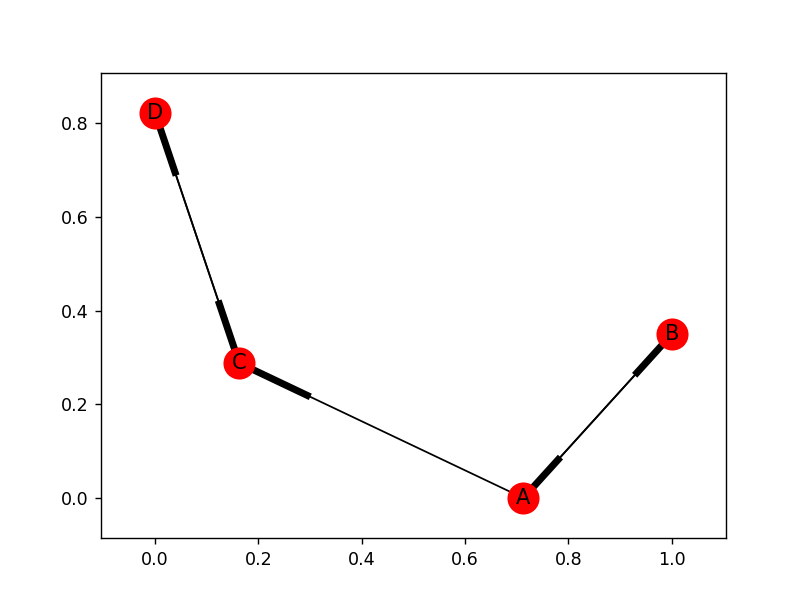

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [25]:
nx.draw_networkx(G)

In [26]:
nx.pagerank(G, alpha=0.5)

{'A': 0.21428680419921875,
 'B': 0.1785717010498047,
 'C': 0.3214282989501953,
 'D': 0.28571319580078125}

In [28]:
nx.pagerank(G,alpha=0.8)

{'A': 0.13235426576459627,
 'B': 0.1029417063058385,
 'C': 0.3970582936941615,
 'D': 0.36764573423540375}

In [30]:
nx.pagerank(G,alpha=0.95)

{'A': 0.04442211856731087,
 'B': 0.03360050631947267,
 'C': 0.46639949368052747,
 'D': 0.4555778814326893}

In [31]:
nx.pagerank(G,alpha=0.9)

{'A': 0.07983327489935103,
 'B': 0.06092586099927893,
 'C': 0.4390741390007211,
 'D': 0.420166725100649}

In [32]:
G = nx.DiGraph()
G.add_edges_from([("A","B"),("A","C"),("B","C"),("C","A"),("D","C")])

In [34]:
nx.pagerank(G)

{'A': 0.372526246091333,
 'B': 0.19582365458881654,
 'C': 0.39415009931985023,
 'D': 0.037500000000000006}

In [35]:
#HITS

G = nx.DiGraph()
G.add_edges_from([("A","B"),("A","C"),("B","C"),("C","A"),("D","C")])

In [41]:
nx.hits(G)

({'A': 0.41421356195612885,
  'B': 0.2928932185186695,
  'C': 1.0065322483445805e-09,
  'D': 0.2928932185186695},
 {'A': 2.429983801460681e-09,
  'B': 0.29289321810158986,
  'C': 0.7071067794684264,
  'D': 0.0})

In [ ]:
def answer_four():
    betw_cent = nx.betweenness_centrality(G1, normalized=True, endpoints=False)    
    best_node =  max((i,v) for i,v in betw_cent.items())
    return best_node[0]

def answer_five():
        
    pr = nx.pagerank(G2)
    
    return pr['realclearpolitics.com']